# Train YOLOv9 on a Custom Dataset

1.   List item
2.   List item


---


[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9

!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 27.90 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00


In [5]:
%cd /content/

from google.colab import drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [6]:
# copy the weights

!mkdir /content/weights/
!cp -r /content/drive/MyDrive/OCR-Custom-Dataset/models/YOLOv9-gelan-e/weights_v6_1792/* {HOME}/weights

In [7]:

!ls -la /content/weights/

total 911952
drwxr-xr-x 2 root root      4096 May 27 06:26 .
drwxr-xr-x 1 root root      4096 May 27 06:26 ..
-rw------- 1 root root 466907182 May 27 06:26 best.pt
-rw------- 1 root root 466907182 May 27 06:26 last.pt


# Train Custom Model

## Datatset Preperation

- Yolo Format Dataset
  - dataset
      - train
        - images
        - labels
      - val
        - images
        - labels



- The Image and labels file name should be same
- The images to be store within the images directory (img.jpg)
- labels format (img.txt)
  - each labels should have the following structure
  - class, xc, yc, w, h      <---  Normalized values

In [8]:
%cd /content/

/content


In [ ]:
!rm -rf /content/dataset

In [9]:
# dataset directory structure
!mkdir /content/dataset
!mkdir /content/dataset/train
!mkdir /content/dataset/train/images
!mkdir /content/dataset/train/labels
!mkdir /content/dataset/val
!mkdir /content/dataset/val/images
!mkdir /content/dataset/val/labels

In [10]:
!mkdir raw_dataset
!unzip -q /content/drive/MyDrive/OCR-Custom-Dataset/custom-dataset-v2.zip -d /content/raw_dataset/

In [11]:
print(len(os.listdir("/content/raw_dataset/images")))

180


In [12]:
# move the images into images directory
!mv /content/raw_dataset/images/* /content/dataset/train/images/


# move the labels into labels directory
!mv /content/raw_dataset/labels/* /content/dataset/train/labels/

In [13]:
!rm -rf /content/raw_dataset

In [14]:
# copy second dataset
!mkdir raw_dataset
!unzip -q /content/drive/MyDrive/OCR-Custom-Dataset/custom-dataset-v2-v1-long.zip -d /content/raw_dataset/

In [15]:
# move the images into images directory
!mv /content/raw_dataset/images/* /content/dataset/train/images/


# move the labels into labels directory
!mv /content/raw_dataset/labels/* /content/dataset/train/labels/

In [24]:
%cd /content/

/content


In [ ]:
# move two samples into validation
# 1
!mv /content/dataset/train/images/e0b8f04a-images-84.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/e0b8f04a-images-84.txt /content/dataset/val/labels/

#2
!mv /content/dataset/train/images/96d3c66d-images-24.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/96d3c66d-images-24.txt /content/dataset/val/labels/

#3
!mv /content/dataset/train/images/8cb077b7-images-98.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/8cb077b7-images-98.txt /content/dataset/val/labels/

#3
!mv /content/dataset/train/images/4a46e8f4-images-0.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/4a46e8f4-images-0.txt /content/dataset/val/labels/

#4
!mv /content/dataset/train/images/4d95ce6f-images-63.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/4d95ce6f-images-63.txt /content/dataset/val/labels/

#5
!mv /content/dataset/train/images/52024d01-images-7.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/52024d01-images-7.txt /content/dataset/val/labels/

#6
!mv /content/dataset/train/images/a658321d-images-96.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/a658321d-images-96.txt /content/dataset/val/labels/

#7
!mv /content/dataset/train/images/a6400752-images-10.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/a6400752-images-10.txt /content/dataset/val/labels/

#8
!mv /content/dataset/train/images/f2004b9d-images-3.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/f2004b9d-images-3.txt /content/dataset/val/labels/

#9
!mv /content/dataset/train/images/f342d8dc-images-26.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/f342d8dc-images-26.txt /content/dataset/val/labels/

#10
!mv /content/dataset/train/images/cfeafc27-images-32.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/cfeafc27-images-32.txt /content/dataset/val/labels/

#11
!mv /content/dataset/train/images/aug_0_48cef899-3_2.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/aug_0_48cef899-3_2.txt /content/dataset/val/labels/

#12
!mv /content/dataset/train/images/aug_0_895ba3bc-1.jpg /content/dataset/val/images/
!mv /content/dataset/train/labels/aug_0_895ba3bc-1.txt /content/dataset/val/labels/

In [ ]:
!rm -rf /content/raw_dataset

In [ ]:
# copy second dataset
!mkdir raw_dataset
!unzip -q /content/drive/MyDrive/OCR-Custom-Dataset/custom-dataset-fractiion-imporovement.zip -d /content/raw_dataset/

In [ ]:
# move the images into images directory
!mv /content/raw_dataset/images/* /content/dataset/train/images/


# move the labels into labels directory
!mv /content/raw_dataset/labels/* /content/dataset/train/labels/

In [ ]:
# unzip the third images

!unzip /content/project-3-at-2025-05-20-14-35-1549ca81.zip

In [ ]:
# copy images and labels into dataset train and labels
!cp -r /content/images/* /content/dataset/train/images/
!cp -r /content/labels/* /content/dataset/train/labels/

In [ ]:
import os

print("Training Images & Labels")
print(len(os.listdir("/content/dataset/train/images")))
print(len(os.listdir("/content/dataset/train/labels")))


print("\nValidation Images & Labels")
print(len(os.listdir("/content/dataset/val/images")))
print(len(os.listdir("/content/dataset/val/labels")))

Training Images & Labels
337
337

Validation Images & Labels
13
13


In [16]:
## cropping the image of shape 2048x2048 into shpae of 1792x1792
## and also it by defualt skip the images with 1792x1792
## this script it for train images


import os
import cv2
import shutil


# INPUT PATHS
IMAGE_DIR = '/content/dataset/train/images'       # input image folder
LABEL_DIR = '/content/dataset/train/labels'       # input label folder (YOLO format)

# OUTPUT PATHS
OUT_IMAGE_DIR = '/content/dataset/train/image'
OUT_LABEL_DIR = '/content/dataset/train/label'

# Ensure output folders exist
os.makedirs(OUT_IMAGE_DIR, exist_ok=True)
os.makedirs(OUT_LABEL_DIR, exist_ok=True)

# Parameters
ORIG_SIZE = 2048
TARGET_SIZE = 1792
OFFSET = (ORIG_SIZE - TARGET_SIZE) // 2

def process_image_and_label(image_path, label_path, out_img_path, out_lbl_path):
    img = cv2.imread(image_path)
    if img is None or img.shape[0] != ORIG_SIZE or img.shape[1] != ORIG_SIZE:

        cv2.imwrite(out_img_path, img)
        # Write updated label file
        shutil.copy2(label_path, out_lbl_path)
        return

    # Crop center
    cropped = img[OFFSET:OFFSET+TARGET_SIZE, OFFSET:OFFSET+TARGET_SIZE]
    cv2.imwrite(out_img_path, cropped)

    # Process label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    new_labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        cls, x, y, w, h = parts
        x, y, w, h = map(float, [x, y, w, h])

        # Convert to absolute
        x_abs = x * ORIG_SIZE
        y_abs = y * ORIG_SIZE
        w_abs = w * ORIG_SIZE
        h_abs = h * ORIG_SIZE

        # Adjust for cropping
        x_abs -= OFFSET
        y_abs -= OFFSET

        # Skip boxes that fall outside
        if (x_abs < 0 or x_abs > TARGET_SIZE or
            y_abs < 0 or y_abs > TARGET_SIZE):
            continue

        # Clip boxes to stay within bounds
        x_abs = min(max(x_abs, 0), TARGET_SIZE)
        y_abs = min(max(y_abs, 0), TARGET_SIZE)
        w_abs = min(w_abs, TARGET_SIZE)
        h_abs = min(h_abs, TARGET_SIZE)

        # Normalize for new image
        x_new = x_abs / TARGET_SIZE
        y_new = y_abs / TARGET_SIZE
        w_new = w_abs / TARGET_SIZE
        h_new = h_abs / TARGET_SIZE

        new_labels.append(f"{cls} {x_new:.6f} {y_new:.6f} {w_new:.6f} {h_new:.6f}")

    # Write updated label file
    with open(out_lbl_path, 'w') as f:
        f.write('\n'.join(new_labels) + '\n')


# Main loop
for fname in os.listdir(IMAGE_DIR):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        base = os.path.splitext(fname)[0]
        image_path = os.path.join(IMAGE_DIR, fname)
        label_path = os.path.join(LABEL_DIR, base + '.txt')
        out_img_path = os.path.join(OUT_IMAGE_DIR, base + '.jpg')
        out_lbl_path = os.path.join(OUT_LABEL_DIR, base + '.txt')

        if os.path.exists(label_path):
            process_image_and_label(image_path, label_path, out_img_path, out_lbl_path)
        else:
            print(f"Label missing for {fname}, skipping.")

In [17]:
## cropping the image of shape 2048x2048 into shpae of 1792x1792
## and also it by defualt skip the images with 1792x1792
## this script it for test images


import os
import cv2

# INPUT PATHS
IMAGE_DIR = '/content/dataset/val/images'       # input image folder
LABEL_DIR = '/content/dataset/val/labels'       # input label folder (YOLO format)

# OUTPUT PATHS
OUT_IMAGE_DIR = '/content/dataset/val/image'
OUT_LABEL_DIR = '/content/dataset/val/label'

# Ensure output folders exist
os.makedirs(OUT_IMAGE_DIR, exist_ok=True)
os.makedirs(OUT_LABEL_DIR, exist_ok=True)

# Parameters
ORIG_SIZE = 2048
TARGET_SIZE = 1792
OFFSET = (ORIG_SIZE - TARGET_SIZE) // 2

def process_image_and_label(image_path, label_path, out_img_path, out_lbl_path):
    img = cv2.imread(image_path)
    if img is None or img.shape[0] != ORIG_SIZE or img.shape[1] != ORIG_SIZE:

        cv2.imwrite(out_img_path, img)
        # Write updated label file
        shutil.copy2(label_path, out_lbl_path)
        return

    # Crop center
    cropped = img[OFFSET:OFFSET+TARGET_SIZE, OFFSET:OFFSET+TARGET_SIZE]
    cv2.imwrite(out_img_path, cropped)

    # Process label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    new_labels = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        cls, x, y, w, h = parts
        x, y, w, h = map(float, [x, y, w, h])

        # Convert to absolute
        x_abs = x * ORIG_SIZE
        y_abs = y * ORIG_SIZE
        w_abs = w * ORIG_SIZE
        h_abs = h * ORIG_SIZE

        # Adjust for cropping
        x_abs -= OFFSET
        y_abs -= OFFSET

        # Skip boxes that fall outside
        if (x_abs < 0 or x_abs > TARGET_SIZE or
            y_abs < 0 or y_abs > TARGET_SIZE):
            continue

        # Clip boxes to stay within bounds
        x_abs = min(max(x_abs, 0), TARGET_SIZE)
        y_abs = min(max(y_abs, 0), TARGET_SIZE)
        w_abs = min(w_abs, TARGET_SIZE)
        h_abs = min(h_abs, TARGET_SIZE)

        # Normalize for new image
        x_new = x_abs / TARGET_SIZE
        y_new = y_abs / TARGET_SIZE
        w_new = w_abs / TARGET_SIZE
        h_new = h_abs / TARGET_SIZE

        new_labels.append(f"{cls} {x_new:.6f} {y_new:.6f} {w_new:.6f} {h_new:.6f}")

    # Write updated label file
    with open(out_lbl_path, 'w') as f:
        f.write('\n'.join(new_labels) + '\n')


# Main loop
for fname in os.listdir(IMAGE_DIR):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        base = os.path.splitext(fname)[0]
        image_path = os.path.join(IMAGE_DIR, fname)
        label_path = os.path.join(LABEL_DIR, base + '.txt')
        out_img_path = os.path.join(OUT_IMAGE_DIR, base + '.jpg')
        out_lbl_path = os.path.join(OUT_LABEL_DIR, base + '.txt')

        if os.path.exists(label_path):
            process_image_and_label(image_path, label_path, out_img_path, out_lbl_path)
        else:
            print(f"Label missing for {fname}, skipping.")


In [18]:
!rm -rf /content/dataset/train/images
!rm -rf /content/dataset/train/labels

!rm -rf /content/dataset/val/images
!rm -rf /content/dataset/val/labels

!rm -rf /content/raw_dataset

In [ ]:
# this script verify the dataset that wheather
# it has the correct labels and images or not

import os
import cv2

# Paths
IMAGE_DIR = '/content/dataset/train/image'
LABEL_DIR = '/content/dataset/train/label'
SAVE_DIR = '/content/dataset/train/vis_1888'


BOX_COLOR = (0, 255, 0)
TEXT_COLOR = (0, 0, 255)
THICKNESS = 2
FONT = cv2.FONT_HERSHEY_SIMPLEX
os.makedirs(SAVE_DIR, exist_ok=True)


def draw_yolo_boxes(image_path, label_path, save_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found or unreadable: {image_path}")
        return

    h, w = image.shape[:2]

    if not os.path.exists(label_path):
        print(f"Label not found for {image_path}")
        return

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        cls_id, x, y, bw, bh = map(float, parts)

        # Convert YOLO to absolute
        cx, cy = x * w, y * h
        bw, bh = bw * w, bh * h
        x1 = int(cx - bw / 2)
        y1 = int(cy - bh / 2)
        x2 = int(cx + bw / 2)
        y2 = int(cy + bh / 2)

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), BOX_COLOR, THICKNESS)
        cv2.putText(image, f"Class {int(cls_id)}", (x1, y1 - 5), FONT, 0.5, TEXT_COLOR, 1)

    cv2.imwrite(save_path, image)

# Process all images
for idx, fname in enumerate(os.listdir(IMAGE_DIR)):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        base = os.path.splitext(fname)[0]
        image_path = os.path.join(IMAGE_DIR, fname)
        label_path = os.path.join(LABEL_DIR, base + '.txt')
        save_path = os.path.join(SAVE_DIR, fname)
        draw_yolo_boxes(image_path, label_path, save_path)

    if idx == 50:
      break

In [1]:
!rm -rf /content/dataset/train/images
!rm -rf /content/dataset/train/labels
!rm -rf /content/dataset/val/images
!rm -rf /content/dataset/val/labels

In [ ]:
## data.yaml configuration for yolo
# names:
# - Text

# nc: 1

# train: ../dataset/train/images
# val: ../dataset/val/images



In [19]:
!touch /content/dataset/data.yaml

In [20]:
!mv /content/dataset /content/yolov9

### Dataset - (615 - 2048x2048) -- Coco to YOLO --  Base Model


In [ ]:
import os
import json
import shutil

In [ ]:
%cd /content/
!unzip -q /content/drive/MyDrive/OCR-Custom-Dataset/combine_images.zip

/content


In [ ]:
# copy the combine image folder into local folder ("/content/")
!cp -r /content/content/combine_images /content/

!rm -rf /content/content

In [ ]:
input_path = "/content/combine_images/combine_labels.json"

with open(input_path, 'r') as f:
  data = json.load(f)


print(len(data))

615


In [ ]:
# dataset directory structure
!mkdir /content/dataset
!mkdir /content/dataset/train
!mkdir /content/dataset/train/images
!mkdir /content/dataset/train/labels
!mkdir /content/dataset/val
!mkdir /content/dataset/val/images
!mkdir /content/dataset/val/labels

In [ ]:
root_read_img = "/content/combine_images/images/"

root_write_img_train = "/content/dataset/train/images/"
root_write_label_train = "/content/dataset/train/labels/"


for idx, sample in enumerate(data[:-2]):
  file_name = sample['ocr']
  print("fileName", file_name)

  ## verify image name
  flag = os.path.exists(f"{root_read_img}{file_name}")
  if not flag:
    file_name = "_".join(file_name.split("_")[3:])
    file_path = os.path.join(root_read_img, file_name)
    flag = os.path.exists(file_path)


  ## iterate over one sample bboxes
  new_bbox = []
  for box in sample['bbox']:
    x1, y1, x2, y2 = box['x1'], box['y1'], box['x2'], box['y2']

    ## convert x1, y1, x2, y2 -->
    xc = (x1 + x2) / 2
    yc = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    ## Normalize the values
    xc = xc / 2048
    yc = yc / 2048
    w = w / 2048
    h = h / 2048
    ## append new_bbox
    new_bbox.append([0, xc, yc, w, h])


  # ## write text file
  write_label_path = os.path.join(root_write_label_train, f"{file_name.split('.')[0]}.txt")
  with open(write_label_path, 'w') as f:
    for bbox in new_bbox:
      f.write(' '.join([str(x) for x in bbox]) + '\n')

  ## move the images
  original_image_path = os.path.join(root_read_img, file_name)
  write_image_path = os.path.join(root_write_img_train)
  shutil.move(original_image_path, write_image_path)



  print(f"Label File saved at {write_label_path}")
  print(f"Image moved from {original_image_path} to {write_image_path}")

In [ ]:
print(len(os.listdir("/content/dataset/train/images/")))
print(len(os.listdir("/content/dataset/train/labels/")))

613
613


In [ ]:
root_read_img = "/content/combine_images/images/"

root_write_img_val = "/content/dataset/val/images/"
root_write_label_val = "/content/dataset/val/labels/"


for idx, sample in enumerate(data[613:]):
  file_name = sample['ocr']

  ## verify image name
  flag = os.path.exists(f"{root_read_img}{file_name}")
  if not flag:
    file_name = "_".join(file_name.split("_")[3:])
    file_path = os.path.join(root_read_img, file_name)
    flag = os.path.exists(file_path)


  ## iterate over one sample bboxes
  new_bbox = []
  for box in sample['bbox']:
    x1, y1, x2, y2 = box['x1'], box['y1'], box['x2'], box['y2']

    ## convert x1, y1, x2, y2 -->
    xc = (x1 + x2) / 2
    yc = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    ## Normalize the values
    xc = xc / 2048
    yc = yc / 2048
    w = w / 2048
    h = h / 2048
    ## append new_bbox
    new_bbox.append([0, xc, yc, w, h])


  # ## write text file
  write_label_path = os.path.join(root_write_label_val, f"{file_name.split('.')[0]}.txt")
  with open(write_label_path, 'w') as f:
    for bbox in new_bbox:
      f.write(' '.join([str(x) for x in bbox]) + '\n')

  ## move the images
  original_image_path = os.path.join(root_read_img, file_name)
  write_image_path = os.path.join(root_write_img_val)
  shutil.move(original_image_path, write_image_path)



  print(f"Label File saved at {write_label_path}")
  print(f"Image moved from {original_image_path} to {write_image_path}")

Label File saved at /content/dataset/val/labels/rot_90cw__fe2c7084-3_6.txt
Image moved from /content/combine_images/images/rot_90cw__fe2c7084-3_6.jpg to /content/dataset/val/images/
Label File saved at /content/dataset/val/labels/rot_90cw__a68100c3-3_7.txt
Image moved from /content/combine_images/images/rot_90cw__a68100c3-3_7.jpg to /content/dataset/val/images/


In [ ]:
print(len(os.listdir("/content/dataset/val/images/")))
print(len(os.listdir("/content/dataset/val/labels/")))

2
2


## Training

In [27]:
%cd /content/yolov9
# 1856

!python train.py \
--batch 1 --epochs 25 --img 1792 --min-items 0 --workers 0 --close-mosaic 15 \
--data /content/yolov9/dataset/data.yaml \
--weights /content/weights/best.pt \
--cfg models/detect/gelan-e.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2025-05-27 06:45:29.014074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748328329.039003    6168 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748328329.046394    6168 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-27 06:45:29.070985: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results


In [ ]:
!cp -r /content/yolov9/runs/train/exp2/weights/best.pt /content/drive/MyDrive/OCR-Custom-Dataset/models/YOLOv9-gelan-e/weights_v4_1792/

## Inference with Custom Model

In [ ]:
%cd /content/yolov9

/content/yolov9


In [ ]:
import os


os.getcwd()
os.chdir("/content/yolov9")

In [ ]:
import os
from PIL import Image

def patch_image(image_path, output_dir, patch_size=1792):
    # Load the image
    image = Image.open(image_path)
    width, height = image.size

    # Make sure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    patch_id = 0
    for top in range(0, height, patch_size):
        for left in range(0, width, patch_size):
            right = left + patch_size
            bottom = top + patch_size

            # Discard if patch is out of bounds (less than patch_size)
            if right > width or bottom > height:
                continue

            patch = image.crop((left, top, right, bottom))
            patch_filename = os.path.join(output_dir, f"patch_{patch_id:04d}.png")
            patch.save(patch_filename)
            patch_id += 1

            # if patch_id == 3:
            #   return

    print(f"Saved {patch_id} patches to '{output_dir}'.")

    if patch_id == 15:
      return
image_path = "/content/Training 20March_P14456A-14-01-08-0642-1-Test-Single Scaling.jpg"
output_dir = "patches"
patch_image(image_path, output_dir)

Saved 15 patches to 'patches'.


In [ ]:
!python detect.py \
--img 1792 --conf 0.3 \
--weights /content/weights/best.pt \
--source /content/yolov9/patches

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

In [ ]:
## zip the detected test images

!zip -r test_02.zip /content/yolov9/runs/detect/exp

updating: content/yolov9/runs/detect/exp/ (stored 0%)
updating: content/yolov9/runs/detect/exp/patch_0012.png (deflated 30%)
updating: content/yolov9/runs/detect/exp/patch_0006.png (deflated 26%)
updating: content/yolov9/runs/detect/exp/patch_0011.png (deflated 28%)
updating: content/yolov9/runs/detect/exp/patch_0002.png (deflated 33%)
updating: content/yolov9/runs/detect/exp/patch_0013.png (deflated 29%)
updating: content/yolov9/runs/detect/exp/patch_0009.png (deflated 32%)
updating: content/yolov9/runs/detect/exp/patch_0007.png (deflated 27%)
updating: content/yolov9/runs/detect/exp/patch_0010.png (deflated 30%)
updating: content/yolov9/runs/detect/exp/patch_0008.png (deflated 24%)
updating: content/yolov9/runs/detect/exp/patch_0004.png (deflated 31%)
updating: content/yolov9/runs/detect/exp/patch_0000.png (deflated 33%)
updating: content/yolov9/runs/detect/exp/patch_0005.png (deflated 33%)
updating: content/yolov9/runs/detect/exp/patch_0003.png (deflated 26%)
updating: content/yolov

In [ ]:
!cp -r /content/yolov9/runs/train/exp/weights_v2 /content/drive/MyDrive/OCR-Custom-Dataset/models/YOLOv9-gelan-e/

## Convert To onnx

In [ ]:
import os

os.getcwd()
os.chdir("/content/yolov9/")

In [ ]:
!python export.py --weights /content/weights/best.pt --img 1792 --batch 1 --device 0 --include onnx

export: data=data/coco.yaml, weights=['/content/weights/best.pt'], imgsz=[1792], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-e summary: 930 layers, 58002835 parameters, 0 gradients, 190.8 GFLOPs

PyTorch: starting from /content/weights/best.pt with output shape (1, 5, 65856) (445.3 MB)
requirements: YOLO requirement "onnx" not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 111.5 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.18.0...
ONNX: export success ✅ 12.7s, saved as /content/weights/b

In [ ]:
# copy the model to drive

!cp /content/weights/best.onnx /content/drive/MyDrive/OCR-Custom-Dataset/models/YOLOv9-gelan-e/weights_v4_1792/

In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
import onnxruntime

/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


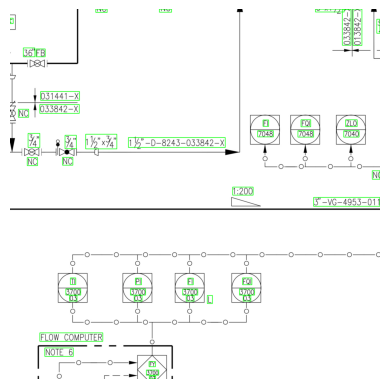

In [ ]:
import onnxruntime as ort
import cv2
import numpy as np

# Paths
onnx_model = "/content/weights/best.onnx"
image_path = "/content/patches/patch_0013.png"
img_size = 1792

# Preprocess
img = cv2.imread(image_path)
img = cv2.resize(img, (img_size, img_size))
img_input = img.astype(np.float32) / 255.0
img_input = np.transpose(img_input, (2, 0, 1))  # HWC → CHW
img_input = np.expand_dims(img_input, axis=0)   # CHW → NCHW

# Inference
session = ort.InferenceSession(onnx_model, providers=['CUDAExecutionProvider'])
inputs = {session.get_inputs()[0].name: img_input}
outputs = session.run(None, inputs)


output = outputs[0]  # (1, 5, 65856)
output = np.squeeze(output)         # → (5, 65856)
output = np.transpose(output, (1, 0))  # → (65856, 5)


import cv2
import numpy as np
import matplotlib.pyplot as plt

# img_path = "/content/patch_0006.png"
img = cv2.imread(image_path)

# Collect boxes and scores
boxes = []
confidences = []

for det in output:
    x, y, w, h, conf = det
    if conf < 0.2:
        continue
    x1 = int(x - w / 2)
    y1 = int(y - h / 2)
    x2 = int(x + w / 2)
    y2 = int(y + h / 2)
    boxes.append([x1, y1, x2 - x1, y2 - y1])  # (x, y, width, height)
    confidences.append(float(conf))

# Apply NMS
indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.2, nms_threshold=0.4)

# Draw final boxes
for i in indices:
    i = i[0] if isinstance(i, (list, np.ndarray)) else i
    x, y, w, h = boxes[i]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save and show
cv2.imwrite("output.jpg", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Execute Parallel Inference

In [ ]:
import numpy as np
import cv2
import onnxruntime as ort
from concurrent.futures import ProcessPoolExecutor
import os

# Path to model and image patches
onnx_model_path = "/content/weights/best.onnx"
patches_dir = "/content/patches"
img_size = 1792

# Global model session (one per process)
session = None

def init_model():
    global session
    session = ort.InferenceSession(onnx_model_path, providers=["CPUExecutionProvider"])

def run_patch_inference(patch_path: str):
    global session
    # Load the image patch
    patch = cv2.imread(patch_path)
    if patch is None:
        raise ValueError(f"Failed to read {patch_path}")

    # Resize if needed
    if patch.shape[:2] != (img_size, img_size):
        patch = cv2.resize(patch, (img_size, img_size))

    # Normalize (optional - depends on training setup)
    patch = patch.astype(np.float32) / 255.0

    # Prepare input for ONNX model
    patch_input = patch.transpose(2, 0, 1)  # HWC to CHW
    patch_input = np.expand_dims(patch_input, axis=0)  # Add batch dim
    input_name = session.get_inputs()[0].name

    # Run inference
    outputs = session.run(None, {input_name: patch_input})
    return outputs

if __name__ == "__main__":
    # List of all image patch file paths
    patch_paths = [os.path.join(patches_dir, f) for f in os.listdir(patches_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Run inference in parallel
    with ProcessPoolExecutor(max_workers=2, initializer=init_model) as executor:
        results = list(executor.map(run_patch_inference, patch_paths))

    print(f"Inference completed for {len(results)} patches.")


Inference completed for 3 patches.
